In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Analisi diffusione COVID-19 nel mondo Il committente richiede di avere un report su casi e vaccinazioni in diverse aree del mondo; a tal fine, richiede di utilizzare il dataset, curato da Our World in Data

In [2]:
covid = pd.read_csv("beginner_datasets/owid-covid-data.csv")
covid

iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
1           AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
2           AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   
3           AFG      Asia  Afghanistan  2020-01-08          NaN        0.0   
4           AFG      Asia  Afghanistan  2020-01-09          NaN        0.0   
...         ...       ...          ...         ...          ...        ...   
387290      ZWE    Africa     Zimbabwe  2024-03-13     266359.0        0.0   
387291      ZWE    Africa     Zimbabwe  2024-03-14     266359.0        0.0   
387292      ZWE    Africa     Zimbabwe  2024-03-15     266359.0        0.0   
387293      ZWE    Africa     Zimbabwe  2024-03-16     266359.0        0.0   
387294      ZWE    Africa     Zimbabwe  2024-03-17     266359.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                      NaN           NaN         0.0                  NaN   
1                      NaN           NaN         0.0                  NaN   
2                      NaN           NaN         0.0                  NaN   
3                      NaN           NaN         0.0                  NaN   
4                      NaN           NaN         0.0                  NaN   
...                    ...           ...         ...                  ...   
387290               0.143        5740.0         0.0                  0.0   
387291               0.143        5740.0         0.0                  0.0   
387292               0.143        5740.0         0.0                  0.0   
387293               0.143        5740.0         0.0                  0.0   
387294               0.000        5740.0         0.0                  0.0   

        ...  male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0       ...           NaN                  37.746                         0.5   
1       ...           NaN                  37.746                         0.5   
2       ...           NaN                  37.746                         0.5   
3       ...           NaN                  37.746                         0.5   
4       ...           NaN                  37.746                         0.5   
...     ...           ...                     ...                         ...   
387290  ...          30.7                  36.791                         1.7   
387291  ...          30.7                  36.791                         1.7   
387292  ...          30.7                  36.791                         1.7   
387293  ...          30.7                  36.791                         1.7   
387294  ...          30.7                  36.791                         1.7   

        life_expectancy  human_development_index  population  \
0                 64.83                    0.511  41128772.0   
1                 64.83                    0.511  41128772.0   
2                 64.83                    0.511  41128772.0   
3                 64.83                    0.511  41128772.0   
4                 64.83                    0.511  41128772.0   
...                 ...                      ...         ...   
387290            61.49                    0.571  16320539.0   
387291            61.49                    0.571  16320539.0   
387292            61.49                    0.571  16320539.0   
387293            61.49                    0.571  16320539.0   
387294            61.49                    0.571  16320539.0   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                        NaN                          NaN   
1                                        NaN                          NaN   
2                                        NaN                          NaN   
3                                        NaN                          NaN   
4                 

Si richiede di verificare le dimensioni del dataset e i relativi metadati

In [3]:
covid.shape

(387295, 67)

In [4]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387295 entries, 0 to 387294
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    387295 non-null  object 
 1   continent                                   368751 non-null  object 
 2   location                                    387295 non-null  object 
 3   date                                        387295 non-null  object 
 4   total_cases                                 348333 non-null  float64
 5   new_cases                                   376280 non-null  float64
 6   new_cases_smoothed                          375050 non-null  float64
 7   total_deaths                                326109 non-null  float64
 8   new_deaths                                  376589 non-null  float64
 9   new_deaths_smoothed                         375359 non-null  float64
 

In [5]:
covid["date"] = pd.to_datetime(covid["date"])
covid["date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 387295 entries, 0 to 387294
Series name: date
Non-Null Count   Dtype         
--------------   -----         
387295 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.0 MB


In [6]:
covid.sample(20)

iso_code      continent             location       date  total_cases  \
197487  OWID_LMC            NaN  Lower middle income 2023-01-28   96523972.0   
214792       MUS         Africa            Mauritius 2021-12-26      90090.0   
77835        CIV         Africa        Cote d'Ivoire 2022-12-13      87894.0   
121566       GAB         Africa                Gabon 2021-02-26      13553.0   
199949       MAC           Asia                Macao 2022-06-20          NaN   
379946       WLF        Oceania    Wallis and Futuna 2020-12-08          3.0   
282278       ROU         Europe              Romania 2020-05-16      15131.0   
186494       LBN           Asia              Lebanon 2022-06-03    1099065.0   
23567        AZE           Asia           Azerbaijan 2021-06-25     335437.0   
71585        COM         Africa              Comoros 2022-08-21       8425.0   
276449       PRT         Europe             Portugal 2021-03-19     792060.0   
27032        BHR           Asia              Bahrain 2022-07-27     654873.0   
119185       GUF  South America        French Guiana 2023-01-14      97946.0   
381633  OWID_WRL            NaN                World 2021-05-09  157031491.0   
306009       SEN         Africa              Senegal 2022-12-22      88895.0   
7921         AND         Europe              Andorra 2020-09-12       1215.0   
124768       GEO           Asia              Georgia 2021-07-10     369048.0   
387033       ZWE         Africa             Zimbabwe 2023-06-30     265413.0   
1729    OWID_AFR            NaN               Africa 2020-07-18     585339.0   
187924       LSO         Africa              Lesotho 2022-02-19      32431.0   

        new_cases  new_cases_smoothed  total_deaths  new_deaths  \
197487        0.0            2691.714     1331431.0         0.0   
214792     1216.0             173.714         762.0        16.0   
77835         0.0               1.000         830.0         0.0   
121566        0.0             139.429          75.0         0.0   
199949        NaN                 NaN           NaN         NaN   
379946        0.0               0.000           NaN         0.0   
282278        0.0             342.714         939.0         0.0   
186494        0.0              80.143       10426.0         0.0   
23567         0.0              44.429        4961.0         0.0   
71585        22.0               3.143         160.0         0.0   
276449        0.0            1082.429       16685.0         0.0   
27032         0.0             991.143        1506.0         0.0   
119185        0.0               9.571         413.0         0.0   
381633  5464575.0          780653.571     3459593.0     92233.0   
306009        0.0               1.000        1968.0         0.0   
7921          0.0              13.000          53.0         0.0   
124768        0.0             789.429        5347.0         0.0   
387033        0.0              17.714        5707.0         0.0   
1729          0.0           16045.714       15789.0         0.0   
187924        0.0              10.000         696.0         0.0   

        new_deaths_smoothed  ...  male_smokers  handwashing_facilities  \
197487               24.000  ...           NaN                     NaN   
214792                2.286  ...        40.700                     NaN   
77835                 0.000  ...           NaN                  19.351   
121566                0.286  ...           NaN                     NaN   
199949                  NaN  ...           NaN                     NaN   
379946                0.000  ...           NaN                     NaN   
282278               24.000  ...        37.100                     NaN   
186494                1.286  ...        40.700                     NaN   
23567                 1.143  ...        42.500                  83.241   
71585                 0.000  ...        23.600                  15.574   
276449               18.571  ...        30.000                     NaN   
27032                 0.143  ..

Si chiede poi per ogni continente di trovare il numero di casi totali avvenuti in quello stesso continente; 
si chiede di non considerare eventuali locazioni che nel dataset non appartengono ad alcun continente

In [7]:
covid.groupby("continent")["new_cases"].sum()

continent
Africa            13141282.0
Asia             301446461.0
Europe           252376812.0
North America    124530643.0
Oceania           14808170.0
South America     68718448.0
Name: new_cases, dtype: float64

In [8]:
continent_list = covid["continent"].unique()
for cl in continent_list:
    if str(cl) != "nan":
        print(str(cl).upper())
        print(covid[covid["location"] == cl]["total_cases"].max())
        print("")

ASIA
301381380.0

EUROPE
252376812.0

AFRICA
13139831.0

OCEANIA
14808141.0

NORTH AMERICA
124525104.0

SOUTH AMERICA
68716854.0



In [9]:
covid[covid["continent"].isnull()].groupby("location")["total_cases"].max()

location
Africa                  13139831.0
Asia                   301381380.0
Europe                 252376812.0
European Union         185596049.0
High income            428366918.0
Low income               2327335.0
Lower middle income     97517992.0
North America          124525104.0
Oceania                 14808141.0
South America           68716854.0
Upper middle income    245529308.0
World                  774954379.0
Name: total_cases, dtype: float64

In [10]:
covid[covid["continent"].isnull()].groupby("location")["new_cases"].sum()

# considerando i raggruppamenti già presenti, questi sono i più aggiornati

location
Africa                  13141282.0
Asia                   301446461.0
Europe                 252376812.0
European Union         185596049.0
High income            428366921.0
Low income               2327688.0
Lower middle income     97583216.0
North America          124525136.0
Oceania                 14808170.0
South America           68718448.0
Upper middle income    245531040.0
World                  775022566.0
Name: new_cases, dtype: float64

Sempre riguardo i casi totali, si chiede di scrivere del codice che, date due variabili contenenti i nomi di continenti, ne confronti i seguenti relativi descrittori statistici: valore massimo, media, e percentuale rispetto al numero dei casi totali nel mondo (calcolati anche sulle locazioni senza indicazione di continente)

In [11]:
w_tot_cases = covid[covid["location"] == "World"]["new_cases"].sum()
w_tot_cases

775022566.0

In [12]:
for cl in continent_list:
    if str(cl) != "nan":
        print(str(cl).upper())
        print("Valore massimo:", covid[covid["continent"] == cl]["new_cases"].sum())
        print("Media giornaliera:", round(covid[covid["continent"] == cl].groupby("date")["new_cases"].sum().mean()))
        print("Percentuale:", round(covid[covid["continent"] == cl]["new_cases"].sum() / w_tot_cases * 100, 2), "%")
        print("")

ASIA
Valore massimo: 301446461.0
Media giornaliera: 194356
Percentuale: 38.9 %

EUROPE
Valore massimo: 252376812.0
Media giornaliera: 162824
Percentuale: 32.56 %

AFRICA
Valore massimo: 13141282.0
Media giornaliera: 8567
Percentuale: 1.7 %

OCEANIA
Valore massimo: 14808170.0
Media giornaliera: 9578
Percentuale: 1.91 %

NORTH AMERICA
Valore massimo: 124530643.0
Media giornaliera: 80342
Percentuale: 16.07 %

SOUTH AMERICA
Valore massimo: 68718448.0
Media giornaliera: 44680
Percentuale: 8.87 %



Selezionare i dati relativi all'Italia nel 2022, 
e mostrare con un grafico adeguato l'evoluzione del casi totali rispetto alla data

Text(0, 0.5, 'Casi totali per 10 Milioni')

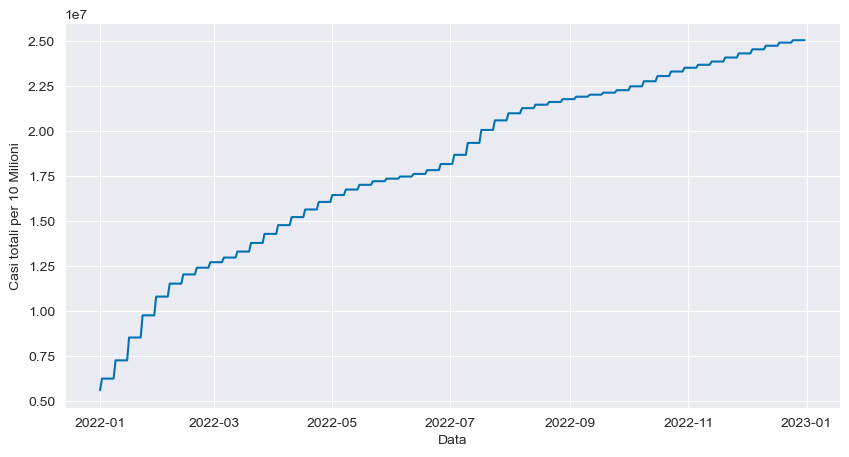

In [13]:
it = covid[
    (covid["location"] == "Italy") & 
    (covid["date"] <= "2022-12-31") & 
    (covid["date"] >= "2022-01-01")
    ]
sns.set_style("darkgrid")
sns.set_palette("colorblind")
plt.figure(figsize=(10, 5))
sns.lineplot(data=it, x="date", y="total_cases")
plt.xlabel("Data")
plt.ylabel("Casi totali per 10 Milioni")

Mostrare poi con un grafico adeguato il numero di nuovi casi rispetto alla data

Text(0, 0.5, 'Casi giornalieri al mese per 1 milione')

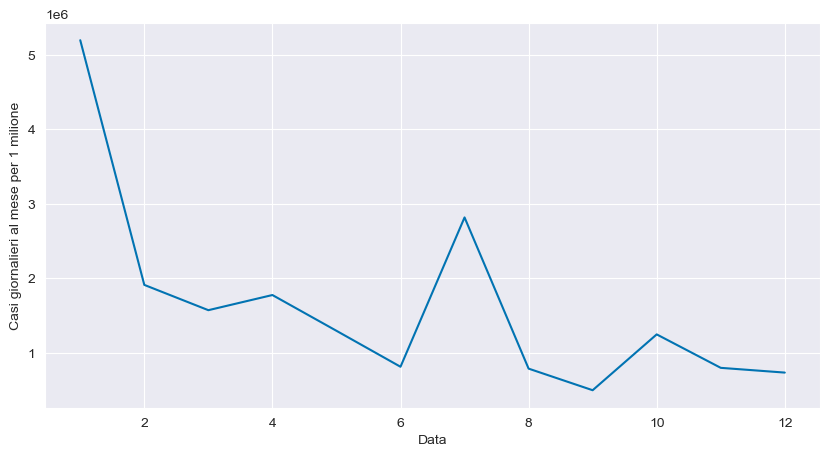

In [14]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=it.groupby(it["date"].dt.month)["new_cases"].sum())
plt.xlabel("Data")
plt.ylabel("Casi giornalieri al mese per 1 milione")

Mostrare infine un grafico che mostra l'andamento della somma cumulativa nuovi casi del 2022, e commentare se ci sono similarità con l'andamento del numero dei casi totali

Text(0, 0.5, 'Nuovi casi comulativi')

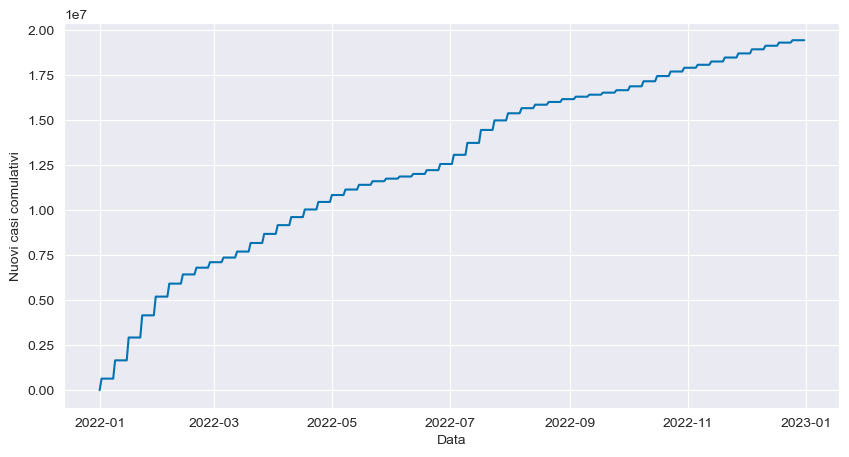

In [15]:
plt.figure(figsize=(10,5))
sns.lineplot(data=it, x="date", y=it["new_cases"].cumsum())
plt.xlabel("Data")
plt.ylabel("Nuovi casi comulativi")

# Questo grafico dovrebbe essere uguale al precedente riguardante i casi totali, la differenza sta nel numero di casi:
# in questo si parte da zero, mentre nell'altro da i "lasciti" del 2020 e 2021.

Riguardo le nazioni di Italia, Germania e Francia, mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso), e scrivere un breve commento a riguardo

In [16]:
filtro_date = covid[
    (covid["date"] >= "2022-05-01") &
    (covid["date"] <= "2023-04-30")
    ]

it_ger_fra = filtro_date[
    (filtro_date["location"] == "Italy") |
    (filtro_date["location"] == "France") |
    (filtro_date["location"] == "Germany")
    ]
it_ger_fra

iso_code continent location       date  total_cases  new_cases  \
117393      FRA    Europe   France 2022-05-01   27742592.0   376510.0   
117394      FRA    Europe   France 2022-05-02   27742592.0        0.0   
117395      FRA    Europe   France 2022-05-03   27742592.0        0.0   
117396      FRA    Europe   France 2022-05-04   27742592.0        0.0   
117397      FRA    Europe   France 2022-05-05   27742592.0        0.0   
...         ...       ...      ...        ...          ...        ...   
166867      ITA    Europe    Italy 2023-04-26   25772459.0        0.0   
166868      ITA    Europe    Italy 2023-04-27   25772459.0        0.0   
166869      ITA    Europe    Italy 2023-04-28   25772459.0        0.0   
166870      ITA    Europe    Italy 2023-04-29   25772459.0        0.0   
166871      ITA    Europe    Italy 2023-04-30   25795509.0    23050.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
117393           53787.143      146744.0       867.0              123.857   
117394           53787.143      146744.0         0.0              123.857   
117395           53787.143      146744.0         0.0              123.857   
117396           53787.143      146744.0         0.0              123.857   
117397           53787.143      146744.0         0.0              123.857   
...                    ...           ...         ...                  ...   
166867            3808.429      189627.0         0.0               26.714   
166868            3808.429      189627.0         0.0               26.714   
166869            3808.429      189627.0         0.0               26.714   
166870            3808.429      189627.0         0.0               26.714   
166871            3292.857      189786.0       159.0               22.714   

        ...  male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
117393  ...          35.6                     NaN                        5.98   
117394  ...          35.6                     NaN                        5.98   
117395  ...          35.6                     NaN                        5.98   
117396  ...          35.6                     NaN                        5.98   
117397  ...          35.6                     NaN                        5.98   
...     ...           ...                     ...                         ...   
166867  ...          27.8                     NaN                        3.18   
166868  ...          27.8                     NaN                        3.18   
166869  ...          27.8                     NaN                        3.18   
166870  ...          27.8                     NaN                        3.18   
166871  ...          27.8                     NaN                        3.18   

        life_expectancy  human_development_index  population  \
117393            82.66                    0.901  67813000.0   
117394            82.66                    0.901  67813000.0   
117395            82.66                    0.901  67813000.0   
117396            82.66                    0.901  67813000.0   
117397            82.66                    0.901  67813000.0   
...                 ...                      ...         ...   
166867            83.51                    0.892  59037472.0   
166868            83.51                    0.892  59037472.0   
166869            83.51                    0.892  59037472.0   
166870            83.51                    0.892  59037472.0   
166871            83.51                    0.892  59037472.0   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
117393                              89517.72                         6.19   
117394                                   NaN                          NaN   
117395                                   NaN                          NaN   
117396                                   NaN                          NaN   
117397                                   NaN                          NaN   
.

Text(0, 0.5, 'Pazienti in terapia intensiva')

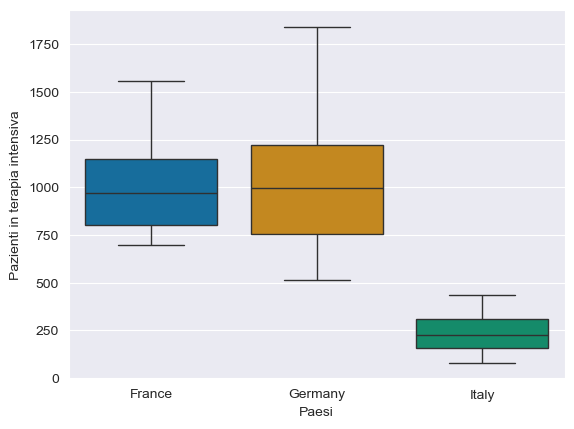

In [17]:
sns.boxplot(data=it_ger_fra, x="location", y="icu_patients", hue="location")
plt.xlabel("Paesi")
plt.ylabel("Pazienti in terapia intensiva")

Riguardo le nazioni di Italia, Germania, Francia e Spagna nel 2023, mostrare la somma dei pazienti ospedalizzati per ognuna – se ci sono dati nulli, suggerire se può essere possibile gestirli tramite sostituzione o meno

In [18]:
_2023 = covid[covid["date"].dt.year == 2023]
igfs = _2023[
    (_2023["location"] == "Italy") |
    (_2023["location"] == "Germany") |
    (_2023["location"] == "France") |
    (_2023["location"] == "Spain")
    ]
igfs

iso_code continent location       date  total_cases  new_cases  \
117638      FRA    Europe   France 2023-01-01   38141254.0   151707.0   
117639      FRA    Europe   France 2023-01-02   38141254.0        0.0   
117640      FRA    Europe   France 2023-01-03   38141254.0        0.0   
117641      FRA    Europe   France 2023-01-04   38141254.0        0.0   
117642      FRA    Europe   France 2023-01-05   38141254.0        0.0   
...         ...       ...      ...        ...          ...        ...   
327855      ESP    Europe    Spain 2023-12-27   13980340.0        NaN   
327856      ESP    Europe    Spain 2023-12-28   13980340.0        NaN   
327857      ESP    Europe    Spain 2023-12-29   13980340.0        NaN   
327858      ESP    Europe    Spain 2023-12-30   13980340.0        NaN   
327859      ESP    Europe    Spain 2023-12-31   13980340.0        NaN   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
117638           21672.429      162475.0       808.0              115.429   
117639           21672.429      162475.0         0.0              115.429   
117640           21672.429      162475.0         0.0              115.429   
117641           21672.429      162475.0         0.0              115.429   
117642           21672.429      162475.0         0.0              115.429   
...                    ...           ...         ...                  ...   
327855                 NaN      121852.0         NaN                  NaN   
327856                 NaN      121852.0         NaN                  NaN   
327857                 NaN      121852.0         NaN                  NaN   
327858                 NaN      121852.0         NaN                  NaN   
327859                 NaN      121852.0         NaN                  NaN   

        ...  male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
117638  ...          35.6                     NaN                        5.98   
117639  ...          35.6                     NaN                        5.98   
117640  ...          35.6                     NaN                        5.98   
117641  ...          35.6                     NaN                        5.98   
117642  ...          35.6                     NaN                        5.98   
...     ...           ...                     ...                         ...   
327855  ...          31.4                     NaN                        2.97   
327856  ...          31.4                     NaN                        2.97   
327857  ...          31.4                     NaN                        2.97   
327858  ...          31.4                     NaN                        2.97   
327859  ...          31.4                     NaN                        2.97   

        life_expectancy  human_development_index  population  \
117638            82.66                    0.901  67813000.0   
117639            82.66                    0.901  67813000.0   
117640            82.66                    0.901  67813000.0   
117641            82.66                    0.901  67813000.0   
117642            82.66                    0.901  67813000.0   
...                 ...                      ...         ...   
327855            83.56                    0.904  47558632.0   
327856            83.56                    0.904  47558632.0   
327857            83.56                    0.904  47558632.0   
327858            83.56                    0.904  47558632.0   
327859            83.56                    0.904  47558632.0   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
117638                             122180.83                         6.64   
117639                                   NaN                          NaN   
117640                                   NaN                          NaN   
117641                                   NaN                          NaN   
117642                                   NaN                          NaN   
.

<Axes: xlabel='location', ylabel='hosp_patients'>

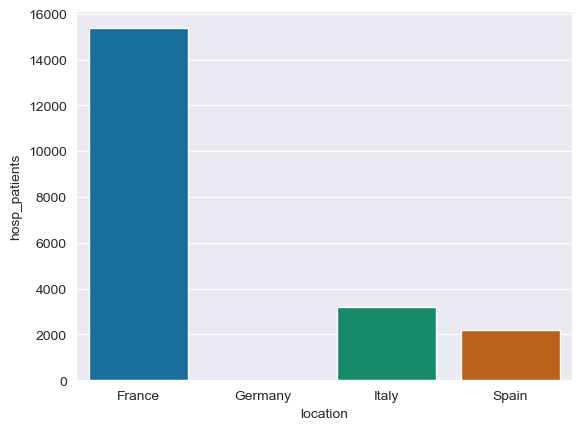

In [19]:
sns.barplot(data=igfs, x="location", y="hosp_patients", hue="location", errorbar=None)

In [20]:
igfs[igfs["location"] == "Germany"]["hosp_patients"]

126842   NaN
126843   NaN
126844   NaN
126845   NaN
126846   NaN
          ..
127202   NaN
127203   NaN
127204   NaN
127205   NaN
127206   NaN
Name: hosp_patients, Length: 365, dtype: float64

In [21]:
igfs[igfs["location"] == "Germany"]["hosp_patients_per_million"]

126842   NaN
126843   NaN
126844   NaN
126845   NaN
126846   NaN
          ..
127202   NaN
127203   NaN
127204   NaN
127205   NaN
127206   NaN
Name: hosp_patients_per_million, Length: 365, dtype: float64

In [22]:
igfs[igfs["location"] == "Germany"]["weekly_hosp_admissions"].sum()

897776.0

<Axes: xlabel='location', ylabel='weekly_hosp_admissions'>

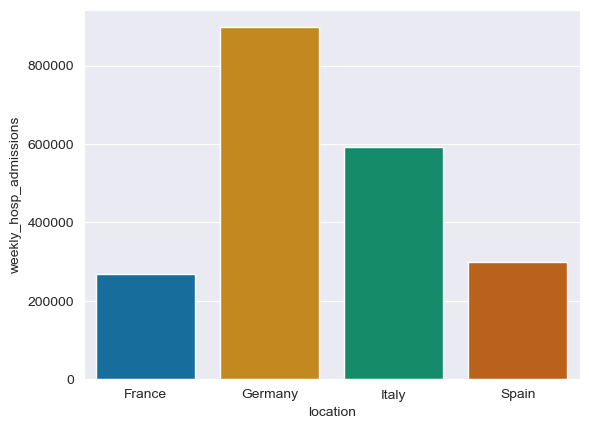

In [23]:
sns.barplot(data=igfs, x="location", y="weekly_hosp_admissions", estimator = "sum", hue="location", errorbar=None)